## Deep Learning in Python

##### 01-basics-of-deep-learning-and-neural networks
comparing neural network models to classical regression models, forward propagation, activation functions, rectified linear activation, applyging the network to many observations/rows,
deeper networks, forward propagation in a deeper network, multi-layer neural networks, representations are learned, levels of representation
##### 02-optimizing-a-neural-network-with-backward-propagation
the need for optimization, calculating model errors, understading how weights change model accuracy,
coding how weights changes affect model accuracy, scaling up to multiple data points,
gradient descent, improving model weights, making multuple updates to weights, backpropagation,
the relationship between forward and backward propagation, thinking about backward propagation,
backpropagation in practice, a round of back propagation,

##### 03-building-deep-learning-models-with-keras
creating keras model, specifying model, compiling and fitting a model, classification models,
understanding your classification data, last steps in classification models, using models, making predictions
##### 04-fine-tuning-keras-models
understanding model optimization, diagnosing optimization models, changing optimization parameters, model_validation, evaluating model accuracy on validation datasets, early stopping: optimizing the optimization, experimenting with wider networks, adding layers to a network, thinking about model capacity, experimenting with model structures, stepping up to images, building your own digit recognition model


#### 01-basics-of-deep-learning-and-neural networks
Imagine you work for a bank, you need to predict how many transactions each customer will make next year?
Example as seen by linear regression
age, bank balance, retirement status -> number of transactions
Models could be with no interactions and with interactions (that cross for 2 categories of clients)

##### Interactions
Neural networks account for interactions really well
Deep learning uses especially powerful neural networks (text, images, videos, audio, source code)

##### Course structure:
First two chapters focus on conceptual knowledge
Debus and tune deep learning models on conventional prediction problems
Lay the foundations for progressing towards modern applications
This will pay off in the third and fourth chapters


##### Build deep learning models with keras

In [ ]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
predictors = np.loadtxt('predictors_data.csv', delimiter=',')
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', inpurt_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))


##### Forward propagation
Make predictions based on:
Number of children, number of existing accounts  (2 children, 2 existing accounts)
Multiply -add process
Dot product
Forward propagation for one data point as a time
Output is the prediction for that data point


Look at code: (2:24 on video)
https://campus.datacamp.com/courses/introduction-to-deep-learning-in-python/basics-of-deep-learning-and-neural-networks?ex=3


###### Forward propagation code

In [ ]:
import numpy as np
input_data = np.array([2,3])
weights = {'node_0': np.array([1,1]),
          'node_1': np.array([-1,1]),
           'output': np.array([2,-1])}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])
print(hidden_layer_values)

output = (hidden_layer_values * weights['output']).sum()

print(output)

#### from exercises
Coding the forward propagation algorithm
In this exercise, you'll write code to do forward propagation (prediction) for your first neural network:

Ch1Ex4

Each data point is a customer. The first input is how many accounts they have, and the second input is how many children they have. The model will predict how many transactions the user makes in the next year. You will use this data throughout the first 2 chapters of this course.

The input data has been pre-loaded as input_data, and the weights are available in a dictionary called weights. The array of weights for the first node in the hidden layer are in weights['node_0'], and the array of weights for the second node in the hidden layer are in weights['node_1'].

The weights feeding into the output node are available in weights['output'].

NumPy will be pre-imported for you as np in all exercises.

Instructions
100 XP
Calculate the value in node 0 by multiplying input_data by its weights weights['node_0'] and computing their sum. This is the 1st node in the hidden layer.
Calculate the value in node 1 using input_data and weights['node_1']. This is the 2nd node in the hidden layer.
Put the hidden layer values into an array. This has been done for you.
Generate the prediction by multiplying hidden_layer_outputs by weights['output'] and computing their sum.
Hit 'Submit Answer' to print the output!


In [1]:
import numpy as np
input_data = np.array([3,5])
weights = {'node_0': np.array([2,4]),
          'node_1': np.array([2,7]),
           'output': np.array([4,-5])}


# Calculate node 0 value: node_0_value
node_0_value = (input_data * weights['node_0']).sum()

# Calculate node 1 value: node_1_value
node_1_value = (input_data * weights['node_1']).sum()

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_value, node_1_value])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


-101


#### Activation functions (linear functions and non-linear functions

activation functions applied  to node inputs to produce node_output

https://numpy.org/doc/stable/reference/generated/numpy.tanh.html

what is tanh?
Tanh is the hyperbolic tangent function, which is the hyperbolic analogue of the Tan circular function used throughout trigonometry. Tanh[α] is defined as the ratio of the corresponding hyperbolic sine and hyperbolic cosine functions via . Tanh may also be defined as , where is the base of the natural logarithm Log.

In [1]:
import numpy as np
input_data = np.array([-1,2])
weights = {'node_0': np.array([3,3]),
          'node_1': np.array([1,5]),
           'output': np.array([2,-1])}


# Calculate node 0 value: node_0_value
node_0_input = (input_data * weights['node_0']).sum()
node_0_output=np.tanh(node_0_input)

# Calculate node 1 value: node_1_value
node_1_input = (input_data * weights['node_1']).sum()
node_1_output=np.tanh(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate output: output
output = (hidden_layer_outputs * weights['output']).sum()

# Print output
print(output)


0.9901095378334199


The Rectified Linear Activation Function
As Dan explained to you in the video, an "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function (called ReLU) has been shown to lead to very high-performance networks. This function takes a single number as an input, returning 0 if the input is negative, and the input if the input is positive.

Here are some examples:
relu(3) = 3
relu(-3) = 0

Fill in the definition of the relu() function:
Use the max() function to calculate the value for the output of relu().
Apply the relu() function to node_0_input to calculate node_0_output.
Apply the relu() function to node_1_input to calculate node_1_output.


In [2]:
input_data = np.array([3,5])
weights = {'node_0': np.array([2,4]),
          'node_1': np.array([4,-5]),
           'output': np.array([2,7])}


def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

# Calculate node 0 value: node_0_output
node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

# Calculate node 1 value: node_1_output
node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

# Put node values into array: hidden_layer_outputs
hidden_layer_outputs = np.array([node_0_output, node_1_output])

# Calculate model output (do not apply relu)
model_output = (hidden_layer_outputs * weights['output']).sum()

# Print model output
print(model_output)

52


Great work! You predicted 52 transactions. Without this activation function, you would have predicted a negative number! The real power of activation functions will come soon when you start tuning model weights.

##### Applying the network to many observations/rows of data

You'll now define a function called predict_with_network() which will generate predictions for multiple data observations, which are pre-loaded as input_data. As before, weights are also pre-loaded. In addition, the relu() function you defined in the previous exercise has been pre-loaded.

Define a function called predict_with_network() that accepts two arguments - input_data_row and weights - and returns a prediction from the network as the output.
Calculate the input and output values for each node, storing them as: node_0_input, node_0_output, node_1_input, and node_1_output.
To calculate the input value of a node, multiply the relevant arrays together and compute their sum.
To calculate the output value of a node, apply the relu() function to the input value of the node.
Calculate the model output by calculating input_to_final_layer and model_output in the same way you calculated the input and output values for the nodes.
Use a for loop to iterate over input_data:
Use your predict_with_network() to generate predictions for each row of the input_data - input_data_row. Append each prediction to results.

In [3]:
input_data = (np.array([3,5]),np.array([1,-1]),np.array([0,0]),np.array([8,4]))
print(input_data)

(array([3, 5]), array([ 1, -1]), array([0, 0]), array([8, 4]))


In [4]:
import numpy as np
input_data = (np.array([3,5]),np.array([1,-1]),np.array([0,0]),np.array([8,4]))
weights = {'node_0': np.array([2,4]),
          'node_1': np.array([4,-5]),
           'output': np.array([2,7])}
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)


# Create empty list to store prediction results
results = []
for input_data_row in input_data:
    # Append prediction to results
    results.append(predict_with_network(input_data_row, weights))

# Print results
print(results)
        

[52, 63, 0, 148]


#### Deeper networks

##### Representation learning
Deep networks internally build representations of patterns in the data
Partially replace the need for feature engineering
Subsequent layers build increasingly sophisticated representations of raw data


##### Deep learning
Model doenst need to specify the interactions
When you train the model, the heural networks get weights that find the relevent patterns to make better predictions


##### Multi-layer neural networks
In this exercise, you'll write code to do forward propagation for a neural network with 2 hidden layers. Each hidden layer has two nodes. The input data has been preloaded as input_data. The nodes in the first hidden layer are called node_0_0 and node_0_1. Their weights are pre-loaded as weights['node_0_0'] and weights['node_0_1'] respectively.

The nodes in the second hidden layer are called node_1_0 and node_1_1. Their weights are pre-loaded as weights['node_1_0'] and weights['node_1_1'] respectively.

We then create a model output from the hidden nodes using weights pre-loaded as weights['output'].

Calculate node_0_0_input using its weights weights['node_0_0'] and the given input_data. Then apply the relu() function to get node_0_0_output.
Do the same as above for node_0_1_input to get node_0_1_output.
Calculate node_1_0_input using its weights weights['node_1_0'] and the outputs from the first hidden layer - hidden_0_outputs. Then apply the relu() function to get node_1_0_output.
Do the same as above for node_1_1_input to get node_1_1_output.
Calculate model_output using its weights weights['output'] and the outputs from the second hidden layer hidden_1_outputs array. Do not apply the relu() function to this output.

In [6]:
weights = {'output': np.array([2,7]),
          'node_1_0': np.array([-1,2]),
          'node_0_0': np.array([2,4]),
          'node_0_1': np.array([4,-5]),
          'node_1_1': np.array([1,2])}
print(weights)

{'output': array([2, 7]), 'node_1_0': array([-1,  2]), 'node_0_0': array([2, 4]), 'node_0_1': array([ 4, -5]), 'node_1_1': array([1, 2])}


In [7]:
input_data = (np.array([3,5]))
print(input_data)

[3 5]


In [8]:
def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)

output = predict_with_network(input_data)
print(output)

182


Wonderful work! The network generated a prediction of 182.

#### Optimizing a neural network with backward propagation
Making accurate predictions gets harder with more points
At any set of weights, there are many values of the error
corresponding to the many points we make prediction for 

###### Loss function
Aggregates errors in predictions from many data points into single number
Measure of model's predictive performance

Lower loss function values means a better model
Goal: Find the weights that give the lowest values for the loss function
Gradient descent


##### Gradient descent:
Imagine you are in a pitch dark field
Want to find the lowest point
Feel the ground to see how it slopes
Take a small step downhill
Repeat untill it is uphill in every direction


##### Gradient descent steps
Start at random point
Until you are somewhere flat:
Find the slope
Take a step downhill


##### Optimizing a model with a single weight



In [10]:
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [11]:
'''
Coding how weight changes affect accuracy
Now you'll get to change weights in a real network and see how they affect model accuracy!
Have a look at the following neural network: Ch2Ex4
Its weights have been pre-loaded as weights_0. Your task in this exercise is to update 
a single weight in weights_0 to create weights_1, which gives a perfect prediction 
(in which the predicted value is equal to target_actual: 3).
Use a pen and paper if necessary to experiment with different combinations. 
You'll use the predict_with_network() function, which takes an array of data as the
first argument, and weights as the second argument.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Create a dictionary of weights called weights_1 where you have changed 1 weight from weights_0
(You only need to make 1 edit to weights_0 to generate the perfect prediction).
Obtain predictions with the new weights using the predict_with_network() function with 
input_data and weights_1.
Calculate the error for the new weights by subtracting target_actual from model_output_1.
Hit 'Submit Answer' to see how the errors compare!
'''
# The data point you will make a prediction for
input_data = np.array([0, 3])

# Sample weights
weights_0 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 1]
            }

# The actual target value, used to calculate the error
target_actual = 3

# Make prediction using original weights
model_output_0 = predict_with_network(input_data, weights_0)

# Calculate error: error_0
error_0 = model_output_0 - target_actual

# Create weights that cause the network to make perfect prediction (3): weights_1
weights_1 = {'node_0': [2, 1],
             'node_1': [1, 2],
             'output': [1, 0]
            }

# Make prediction using new weights: model_output_1
model_output_1 = predict_with_network(input_data, weights_1)

# Calculate error: error_1
error_1 = model_output_1 - target_actual

# Print error_0 and error_1
print(error_0)


6
0


In [14]:
input_data = (np.array([3,5]),np.array([1,-1]),np.array([0,0]),np.array([8,4]))
weights = {'node_0': np.array([2,4]),
          'node_1': np.array([4,-5]),
           'output': np.array([2,7])}
# Define predict_with_network()
def predict_with_network(input_data_row, weights):

    # Calculate node 0 value
    node_0_input = (input_data_row * weights['node_0']).sum()
    node_0_output = relu(node_0_input)

    # Calculate node 1 value
    node_1_input = (input_data_row * weights['node_1']).sum()
    node_1_output = relu(node_1_input)

    # Put node values into array: hidden_layer_outputs
    hidden_layer_outputs = np.array([node_0_output, node_1_output])
    
    # Calculate model output
    input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
    model_output = relu(input_to_final_layer)
    
    # Return model output
    return(model_output)

In [35]:
'''
Scaling up to multiple data points
You've seen how different weights will have different accuracies on a single prediction. 
But usually, you'll want to measure model accuracy on many points. You'll now write code 
to compare model accuracies for two different sets of weights, which have been stored 
as weights_0 and weights_1.
input_data is a list of arrays. Each item in that list contains the data to make a single 
prediction. target_actuals is a list of numbers. Each item in that list is the actual value
we are trying to predict.
In this exercise, you'll use the mean_squared_error() function from sklearn.metrics. 
It takes the true values and the predicted values as arguments.
You'll also use the preloaded predict_with_network() function, which takes an array of
data as the first argument, and weights as the second argument.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Import mean_squared_error from sklearn.metrics.
Using a for loop to iterate over each row of input_data:
Make predictions for each row with weights_0 using the predict_with_network() function and
append it to model_output_0.
Do the same for weights_1, appending the predictions to model_output_1.
Calculate the mean squared error of model_output_0 and then model_output_1 using the 
mean_squared_error() function. The first argument should be the actual values (target_actuals), 
and the second argument should be the predicted values (model_output_0 or model_output_1).
'''

weights_0 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 2]), 'output': np.array([1, 1])}
weights_1 = {'node_0': np.array([2, 1]), 'node_1': np.array([1, 1.5]), 'output': np.array([1, 1.5])}
input_data = [np.array([0, 3]), np.array([1, 2]), np.array([-1, -2]), np.array([4, 0])]
target_actuals = [1, 3, 5, 7]


from sklearn.metrics import mean_squared_error

# Create model_output_0 
model_output_0 = []
# Create model_output_0
model_output_1 = []

# Loop over input_data
for row in input_data:
    # Append prediction to model_output_0
    model_output_0.append(predict_with_network(row, weights_0))
    
    # Append prediction to model_output_1
    model_output_1.append(predict_with_network(row, weights_1))

# Calculate the mean squared error for model_output_0: mse_0
mse_0 = mean_squared_error(target_actuals, model_output_0)

# Calculate the mean squared error for model_output_1: mse_1
mse_1 = mean_squared_error(target_actuals, model_output_1)

# Print mse_0 and mse_1
print("Mean squared error with weights_0: %f" %mse_0)
print("Mean squared error with weights_1: %f" %mse_1)

Mean squared error with weights_0: 37.500000
Mean squared error with weights_1: 49.890625


##### Gradient descent

If the slope is positive:
Going oppposite the slope means moving to lower numbers
Subtract the slope from the current value
Too big step might lead as astray

Solution: learning rate
Update each weight by subtracting learning rate * slope


##### Slope calculation example

3 ---2---> 6
Actual target value = 0

To calculate the slope for weight, need to multiply
Slope of the loss function w.r.t value at the node we feed into
The value of the node that feeds into our weight
Slope of the activation function w.r.t value we feed into

Slope of mean-squared loss function w.r.t prediction:
2*(Predicted value - actual valie)=2 * error
2* -4

If learning rate is 0.01 the new weight would be 
2 - 0.01(-24) = 2.24


##### Code to calculate slopes and update weights


In [ ]:
import numpy as np
weights = np.array([1,2])
input_data=np.array([3,4])
target=6
learning_rate=0.01
preds=(weights * input_data).sum()
error=preds-target
print(error)


gradient = 2*input_data*error
print(gradient)


weights_updated = weights - learning_rate * gradient

preds_updated= (weights_updated * input_data).sum()
error_updated = preds_updated - target
print(error_updated)

In [28]:
'''
Calculating slopes
You're now going to practice calculating slopes. When plotting the mean-squared error loss
function against predictions, the slope is 2 * x * (y-xb), or 2 * input_data * error. 
Note that x and b may have multiple numbers (x is a vector for each data point,
and b is a vector). In this case, the output will also be a vector, which is exactly
what you want.
You're ready to write the code to calculate this slope while using a single data point.
You'll use pre-defined weights called weights as well as data for a single point called 
input_data. The actual value of the target you want to predict is stored in target.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Calculate the predictions, preds, by multiplying weights by the input_data and computing
their sum.
Calculate the error, which is the difference between target and preds. Notice that this 
error corresponds to y-xb in the gradient expression.
Calculate the slope of the loss function with respect to the prediction. To do this, 
you need to take the product of input_data and error and multiply that by 2.
'''

weights = np.array([0, 2, 1])
input_data = np.array([1, 2, 3])
target = 0

# Calculate the predictions: preds
preds = (weights * input_data).sum()


# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = input_data * error * 2

# Print the slope
print(slope)

[14 28 42]


In [29]:
'''
Improving model weights
Hurray! You've just calculated the slopes you need. Now it's time to use those slopes to 
improve your model. If you add the slopes to your weights, you will move in the right direction.
However, it's possible to move too far in that direction. So you will want to take a small
step in that direction first, using a lower learning rate, and verify that the model is
improving.
The weights have been pre-loaded as weights, the actual value of the target as target,
and the input data as input_data. The predictions from the initial weights are stored as preds.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Set the learning rate to be 0.01 and calculate the error from the original predictions.
This has been done for you.
Calculate the updated weights by subtracting the product of learning_rate and slope from
weights.
Calculate the updated predictions by multiplying weights_updated with input_data and
computing their sum.
Calculate the error for the new predictions. Store the result as error_updated.
Hit 'Submit Answer' to compare the updated error to the original!
'''
# Set the learning rate: learning_rate
learning_rate = 0.01

# Calculate the predictions: preds
preds = (weights * input_data).sum()

# Calculate the error: error
error = preds - target

# Calculate the slope: slope
slope = 2 * input_data * error

# Update the weights: weights_updated
weights_updated = weights - learning_rate * slope

# Get updated predictions: preds_updated
preds_updated = (weights_updated * input_data).sum()

# Calculate updated error: error_updated
error_updated = preds_updated - target

# Print the original error
print(error)

# Print the updated error
print(error_updated)

7
5.04


In [30]:
def get_error(input_data, target, weights):
    preds = (weights * input_data).sum()
    error = preds - target
    return error

def get_slope(input_data, target, weights):
    error = get_error(input_data, target, weights)
    slope = 2 * input_data * error
    return slope

def get_mse(input_data, target, weights):
    errors = get_error(input_data, target, weights)
    mse = np.mean(errors ** 2)
    return mse

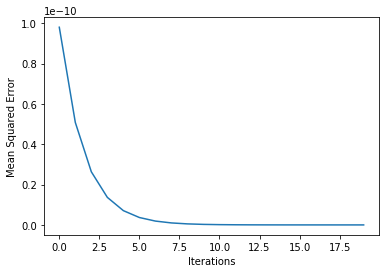

In [33]:
'''
Making multiple updates to weights
You're now going to make multiple updates so you can dramatically improve your model weights, and see how the predictions improve with each update.
To keep your code clean, there is a pre-loaded get_slope() function that takes input_data, target, and weights as arguments. There is also a get_mse() function that takes the same arguments. The input_data, target, and weights have been pre-loaded.
This network does not have any hidden layers, and it goes directly from the input (with 3 nodes) to an output node. Note that weights is a single array.
We have also pre-loaded matplotlib.pyplot, and the error history will be plotted after you have done your gradient descent steps.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Using a for loop to iteratively update weights:
Calculate the slope using the get_slope() function.
Update the weights using a learning rate of 0.01.
Calculate the mean squared error (mse) with the updated weights using the get_mse() function.
Append mse to mse_hist.
Hit 'Submit Answer' to visualize mse_hist. What trend do you notice?
'''
import matplotlib.pyplot as plt 

n_updates = 20
mse_hist = []

# Iterate over the number of updates
for i in range(n_updates):
    # Calculate the slope: slope
    slope = get_slope(input_data, target, weights)
    
    # Update the weights: weights
    weights = weights - 0.01 * slope
    
    # Calculate mse with new weights: mse
    mse = get_mse(input_data, target, weights)
    
    # Append the mse to mse_hist
    mse_hist.append(mse)

# Plot the mse history
plt.plot(mse_hist)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

##### Backpropagation
Allows gradient descent to update all weights in neural network (by getting gradients for all weights)
Comes from chain rule of calculus
Important to understand the process, but you will generally use a library that implements this
Backpropagation process
Trying to estimate the slope of the loss function w.r.t each weight
Do forward propagation to calculate predictions and errors
Go back one layer at a time
Gradients for weight is product of:
Node value feeding into that weight
Slope of loss function w.r.t node it feeds into
Slope of activation function at the node it feeds into
Need to also keep track of the slopes of the loss function w.r.t node values
Slope of node values are the sum of the slopes for all weights that come out of them
Backpropagation in practice
Calculating slopes associated with any weight
Gradients for weight is product of:
Node value feeding into that weight
Slope of activation function for the node being fed into
Slope of loss function w.r.t output node
Recap
Start at some random set of weights
Use forward propagation to make a prediction
Use backward propagation to calculate the slope of the loss function w.r.t each weight
Multiply that slope by the learning rate, and subtract from the current weights
Stochastic Gradient descent
It is common to calculate slopes on only a subset of the data (a batch)
Use a different batch of data to calculate the next update
Each time through the training data is called an epoch
When slopes are calculated on one batch at a time: stochastic gradient descent

#### Building deep learning models with keras
Model Building steps
Specify Architecture
Compile
Fit
Predict

###### Model specification


In [ ]:
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
predictors = np.loadtxt('predictors_data.csv', delimiter=',')
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(100, activation='relu', inpurt_shape=(n_cols,)))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))


##### Data 
building models in Keras to predict wages based on various professional and demographic factors. Before you start building a model, it's good to understand your data by performing some exploratory analysis.


In [37]:
import pandas as pd
df = pd.read_csv('hourly_wages.csv')
df.head()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
0,5.10,0,8,21,35,1,1,0,1,0
1,4.95,0,9,42,57,1,1,0,1,0
2,6.67,0,12,1,19,0,0,0,1,0
3,4.00,0,12,4,22,0,0,0,0,0
4,7.50,0,12,17,35,0,1,0,0,0


In [38]:
df.describe()

,wage_per_hour,union,education_yrs,experience_yrs,age,female,marr,south,manufacturing,construction
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.024064,0.179775,13.018727,17.822097,36.833333,0.458801,0.655431,0.292135,0.185393,0.044944
std,5.139097,0.384360,2.615373,12.379710,11.726573,0.498767,0.475673,0.455170,0.388981,0.207375
min,1.000000,0.000000,2.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.250000,0.000000,12.000000,8.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.780000,0.000000,12.000000,15.000000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,11.250000,0.000000,15.000000,26.000000,44.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,44.500000,1.000000,18.000000,55.000000,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
import tensorflow as tf

predictors = df.iloc[:, 1:].to_numpy()
target = df.iloc[:, 0].to_numpy()

C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [44]:
'''
Specifying a model
Now you'll get to work with your first model in Keras, and will immediately be able to run more
complex neural network models on larger datasets compared to the first two chapters.
To start, you'll take the skeleton of a neural network and add a hidden layer and an output
layer. You'll then fit that model and see Keras do the optimization so your model continually
gets better.
As a start, you'll predict workers wages based on characteristics like their industry, 
education and level of experience. You can find the dataset in a pandas dataframe called df. 
For convenience, everything in df except for the target has been converted to a NumPy matrix 
called predictors. The target, wage_per_hour, is available as a NumPy matrix called target.
For all exercises in this chapter, we've imported the Sequential model constructor, the 
Dense layer constructor, and pandas.
INSTRUCTIONS
100XP
INSTRUCTIONS
100XP
Store the number of columns in the predictors data to n_cols. This has been done for you.
Start by creating a Sequential model called model.
Use the .add() method on model to add a Dense layer.
Add 50 units, specify activation='relu', and the input_shape parameter to be the tuple 
(n_cols,) which means it has n_cols items in each row of data, and any number of rows of
data are acceptable as inputs.
Add another Dense layer. This should have 32 units and a 'relu' activation.
Finally, add an output layer, which is a Dense layer with a single node. Don't use any 
activation function here.
'''
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]

# Set up the model: model
model = tf.keras.Sequential()

# Add the first layer
model.add(tf.keras.layers.Dense(50, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(tf.keras.layers.Dense(32, activation='relu'))

# Add the output layer
model.add(tf.keras.layers.Dense(1))

Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


relu - The Rectified Linear Activation Function


relu(x)= 0 if x<0
relu(x)=x if x>=0


#### Compiling and fitting a model
Why you need to compile your model
Specify the optimizer
Many options and mathematically complex
"Adam" is usually a good choice
Loss function
"mean_squared_error"
Fitting a model
Applying backpropagation and gradient descent with your data to update the weights
Scaling data before fitting can ease optimization
Compiling the model
You're now going to compile the model you specified earlier. To compile the model, you need to specify the optimizer and loss function to use. You can read more about 'adam' optimizer as well as other keras optimizers here, and if you are really curious to learn more, you can read the original paper that introduced the Adam optimizer.

In this exercise, you'll use the Adam optimizer and the mean squared error loss function. Go for it!

In [45]:
'''
Compiling the model
You're now going to compile the model you specified earlier. To compile the model, you need 
to specify the optimizer and loss function to use. In the video, Dan mentioned that the Adam 
optimizer is an excellent choice. You can read more about it as well as other keras optimizers
here, and if you are really curious to learn more, you can read the original paper that 
introduced the Adam optimizer.
In this exercise, you'll use the Adam optimizer and the mean squared error loss function. 
Go for it!
INSTRUCTIONS
100XP
Compile the model using model.compile(). Your optimizer should be 'adam' and the loss should 
be 'mean_squared_error'.
'''
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential

# Specify the model
n_cols = predictors.shape[1]
model = Sequential()
model.add(Dense(50, activation='relu', input_shape = (n_cols,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
#adam usualy a good choice, mean_squared_error common for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Verify that model contains information from compiling
print("Loss function: " + model.loss)

Loss function: mean_squared_error


Optimizer - adam
https://keras.io/optimizers/#adam
paper on adam https://arxiv.org/abs/1412.6980v8



##### Fitting the model
You're at the most fun part. You'll now fit the model. Recall that the data to be used as predictive features is loaded in a NumPy matrix called predictors and the data to be predicted is stored in a NumPy matrix called target. Your model is pre-written and it has been compiled with the code from the previous exercise.

In [46]:
# Fit the model
model.fit(predictors, target, epochs=10);


Epoch 1/10
534/534 [==============================] - 1s 1ms/step - loss: 51.7542
Epoch 2/10
534/534 [==============================] - 0s 41us/step - loss: 29.6195
Epoch 3/10
534/534 [==============================] - 0s 49us/step - loss: 24.3041
Epoch 4/10
534/534 [==============================] - 0s 41us/step - loss: 23.1084
Epoch 5/10
534/534 [==============================] - 0s 41us/step - loss: 22.3352
Epoch 6/10
534/534 [==============================] - 0s 39us/step - loss: 21.8044
Epoch 7/10
534/534 [==============================] - 0s 34us/step - loss: 21.3960
Epoch 8/10
534/534 [==============================] - 0s 37us/step - loss: 21.2558
Epoch 9/10
534/534 [==============================] - 0s 37us/step - loss: 21.3120
Epoch 10/10
534/534 [==============================] - 0s 39us/step - loss: 21.3305


##### Classification models
Classification
categorical_crossentropy loss function <br>
Similar to log loss: Lower is better<br>
Add metrics=['accuracy'] to compile step for easy-to-understand diagnostics<br>
Output layers has separate node for each possible outcome, and uses softmax activation<br>


<b>Understanding your classification data</b><br>
Now you will start modeling with a new dataset for a classification problem. This data includes <br>information about passengers on the Titanic. You will use predictors such as age, fare and where <br>each passenger embarked from to predict who will survive. This data is from a tutorial on data <br>science competitions. Look here for descriptions of the features.<br>

It's smart to review the maximum and minimum values of each variable to ensure the data isn't <br>misformatted or corrupted. What was the maximum age of passengers on the Titanic?<br>

In [20]:
import pandas as pd
df = pd.read_csv('titanic_all_numeric.csv')
df.head()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton,Unnamed: 10
0,0,3,22.0,1,0,7.2500,1,0,0,1,NaN
1,1,1,38.0,1,0,71.2833,0,1,0,0,NaN
2,1,3,26.0,0,0,7.9250,0,0,0,1,NaN
3,1,1,35.0,1,0,53.1000,0,0,0,1,NaN
4,0,3,35.0,0,0,8.0500,1,0,0,1,NaN


In [21]:
df.describe()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton,Unnamed: 10
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,0.0
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.188552,0.086420,0.722783,NaN
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.391372,0.281141,0.447876,NaN
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000,0.000000,0.000000,1.000000,NaN
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,0.000000,0.000000,1.000000,NaN
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,NaN


In [22]:
del df['Unnamed: 10']

In [23]:
import numpy as np
predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = df.survived.astype(np.float32).to_numpy()
n_cols = predictors.shape[1]

In [24]:
'''
Last steps in classification models
You'll now create a classification model using the titanic dataset, which has been pre-loaded 
into a DataFrame called df. You'll take information about the passengers and predict which 
ones survived.
The predictive variables are stored in a NumPy array predictors. The target to predict 
is in df.survived, though you'll have to manipulate it for keras. The number of predictive
features is stored in n_cols.
Here, you'll use the 'sgd' optimizer, which stands for Stochastic Gradient Descent.
You'll learn more about this in the next chapter!
INSTRUCTIONS
100XP
Convert df.survived to a categorical variable using the to_categorical() function.
Specify a Sequential model called model.
Add a Dense layer with 32 nodes. Use 'relu' as the activation and (n_cols,) as the input_shape.
Add the Dense output layer. Because there are two outcomes, it should have 2 units, and 
because it is a classification model, the activation should be 'softmax'.
Compile the model, using 'sgd' as the optimizer, 'categorical_crossentropy' as the loss
function, and metrics=['accuracy'] to see the accuracy
(what fraction of predictions were correct) at the end of each epoch.
Fit the model using the predictors and the target.
'''
# Import necessary modules
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical

# Convert the target to categorical: target
target = to_categorical(df.survived)

# Set up the model
model = Sequential()

# Add the first layer
model.add(Dense(32, activation='relu', input_shape=(n_cols,)))

# Add the second layer
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(predictors, target, epochs=10)

Epoch 1/10
891/891 [==============================] - 0s 93us/step - loss: 2.3207 - accuracy: 0.6117
Epoch 2/10
891/891 [==============================] - 0s 28us/step - loss: 0.8364 - accuracy: 0.6453
Epoch 3/10
891/891 [==============================] - 0s 29us/step - loss: 0.6576 - accuracy: 0.6599
Epoch 4/10
891/891 [==============================] - 0s 31us/step - loss: 0.6240 - accuracy: 0.6734
Epoch 5/10
891/891 [==============================] - 0s 27us/step - loss: 0.6066 - accuracy: 0.6992
Epoch 6/10
891/891 [==============================] - 0s 27us/step - loss: 0.6122 - accuracy: 0.6835
Epoch 7/10
891/891 [==============================] - 0s 30us/step - loss: 0.5858 - accuracy: 0.7015
Epoch 8/10
891/891 [==============================] - 0s 32us/step - loss: 0.5974 - accuracy: 0.7048
Epoch 9/10
891/891 [==============================] - 0s 29us/step - loss: 0.5816 - accuracy: 0.7071
Epoch 10/10
891/891 [==============================] - 0s 26us/step - loss: 0.5855 - accura

#### Using Models
Save, Reload, Make predictions


from keras.models import load_model
model.save('model_file.h5')
my_model=load_model('my_model.h5')
predictions=my_model.predict(data_to_predict_with)
probability_true=predictions[:,1]


###### verifying model structure
my_model.summary()

###### Making predictions
The trained network from your previous coding exercise is now stored as model. New data to make predictions is stored in a NumPy array as pred_data. Use model to make predictions on your new data.

In this exercise, your predictions will be probabilities, which is the most common way for data scientists to communicate their predictions to colleagues.

In [25]:
df_t = pd.read_csv('titanic_pred.csv')
df_t.head()

,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton,Unnamed: 9
0,3,22.0,1,0,7.2500,1,0,0,1,NaN
1,1,38.0,1,0,71.2833,0,1,0,0,NaN
2,3,26.0,0,0,7.9250,0,0,0,1,NaN
3,1,35.0,1,0,53.1000,0,0,0,1,NaN
4,3,35.0,0,0,8.0500,1,0,0,1,NaN


In [26]:
del df_t['Unnamed: 9']
df_t.head()

,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [29]:
pred_data=df_t.astype(np.float32).to_numpy()

In [30]:
# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:, 1]

# Print predicted_prob_true
print(predicted_prob_true)

[0.26681197 0.7083986  0.3142691  0.6469012  0.21759267 0.2609045
 0.5568663  0.44360152 0.39713824 0.55107635 0.47529632 0.4844002
 0.2763183  0.5373514  0.3709368  0.31917995 0.42880756 0.33169737
 0.41388136 0.30371165 0.39642876 0.31186894 0.39228755 0.59041274
 0.45621887 0.60269207 0.24267703 0.80018467 0.3194333  0.23576425
 0.45612755 0.7507786  0.31792298 0.14359972 0.6737705  0.6443785
 0.24271855 0.27211305 0.50939626 0.42671758 0.2778126  0.46502593
 0.24937586 0.53912705 0.3704462  0.23726337 0.3486702  0.31792298
 0.3988372  0.47606444 0.43047363 0.26945537 0.7436897  0.5041522
 0.6041196  0.59541094 0.41578963 0.24740608 0.49674368 0.4186494
 0.2738554  0.73760515 0.7079482  0.43320945 0.47830778 0.36303967
 0.3765383  0.28174198 0.48101884 0.27248305 0.2924052  0.43975964
 0.61803496 0.34673586 0.6149993  0.25162128 0.23576425 0.23726337
 0.5750052  0.34982842 0.27809876 0.2544715  0.318361   0.6155317
 0.41943607 0.40172336 0.47364962 0.23726337 0.8092489  0.25974026
 

In [31]:
'''
Making predictions
The trained network from your previous coding exercise is now stored as model. New data to
make predictions is stored in a NumPy array as pred_data. Use model to make predictions on 
your new data.
In this exercise, your predictions will be probabilities, which is the most common way for
data scientists to communicate their predictions to colleagues.
INSTRUCTIONS
100XP
Create your predictions using the model's .predict() method on pred_data.
Use NumPy indexing to find the column corresponding to predicted probabilities of survival
being True. This is the second column (index 1) of predictions. Store the result in
predicted_prob_true and print it.
'''
# Specify, compile, and fit the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape = (n_cols,)))
model.add(Dense(2, activation='softmax'))
model.compile(optimizer='sgd', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(predictors, target)

# Calculate predictions: predictions
predictions = model.predict(pred_data)

# Calculate predicted probability of survival: predicted_prob_true
predicted_prob_true = predictions[:,1]

# print predicted_prob_true
print(predicted_prob_true)

Epoch 1/1
891/891 [==============================] - 0s 110us/step - loss: 3.2324 - accuracy: 0.5791
[4.76712361e-02 1.73884884e-01 3.15263905e-02 1.02580875e-01
 1.21258860e-02 2.75608283e-02 4.42528259e-03 6.57315791e-01
 2.23781765e-02 3.22947830e-01 4.56852466e-01 8.89661489e-04
 5.91413453e-02 8.10637232e-03 1.07470043e-01 1.33698329e-03
 7.96928048e-01 2.19686273e-02 1.50430808e-02 1.95236672e-02
 1.32319834e-02 1.38674174e-02 1.23289339e-01 8.99509490e-02
 3.84071410e-01 1.01716164e-02 1.96601916e-02 9.99992967e-01
 2.76703741e-02 2.14568563e-02 7.00428942e-03 9.83854115e-01
 2.77376063e-02 8.76222504e-04 6.22854412e-01 3.07868794e-02
 1.96586344e-02 5.33653051e-02 9.68789235e-02 1.02005877e-01
 6.66172104e-03 3.54201756e-02 1.94119811e-02 7.76975274e-01
 8.36079866e-02 2.13943962e-02 2.35490557e-02 2.77376063e-02
 1.67402141e-02 9.62506831e-02 6.46564126e-01 5.36098257e-02
 5.10447286e-02 3.62868160e-02 1.31094980e-03 6.96360767e-02
 5.69206737e-02 2.23393552e-02 5.81595540e-01

#### Fine-tuning keras models


Undestading model optimization:

##### Why optimization is hard
Simultaneously optimizing 1000s of parameters with complex relationships
Updates may not improve model meaningfully
Updates too small (if learning rate is low) or too large (if learning rate is high)

##### Stochastic gradient descent
def get_new_model(input_shape = input_shape):
    model=Sequential()
    model.add(Dense(100, activation='relu', input_shape=input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='solftmax'))
lr_to_test = [.00001, 0.01, 1]

#loop over learning rates
for lr in lr_to_test:
    model = get_new_model()
    my_optimizer = SGD(lr=lr)
    model.compile(optimizer=my_optimizer, loss='categorical_crossentropy')
    model.fit(predictors, target)



Vanishing gradients
Occurs when many layers have very small slopes (e.g. due to being on flat part of tanh curve)
In deep networks, updates to backprop were close to 0

In [33]:
'''
Changing optimization parameters
It's time to get your hands dirty with optimization. You'll now try optimizing a model at a very
low learning rate, a very high learning rate, and a "just right" learning rate. You'll want 
to look at the results after running this exercise, remembering that a low value for the loss
function is good.
For these exercises, we've pre-loaded the predictors and target values from your previous 
classification models (predicting who would survive on the Titanic). You'll want the
optimization to start from scratch every time you change the learning rate, to give a fair 
comparison of how each learning rate did in your results. So we have created a function
get_new_model() that creates an unoptimized model to optimize.
INSTRUCTIONS
100XP
Import SGD from keras.optimizers.
Create a list of learning rates to try optimizing with called lr_to_test. 
The learning rates in it should be .000001, 0.01, and 1.
Using a for loop to iterate over lr_to_test:
Use the get_new_model() function to build a new, unoptimized model.
Create an optimizer called my_optimizer using the SGD() constructor with keyword 
argument lr=lr.
Compile your model. Set the optimizer parameter to be the SGD object you created above,
and because this is a classification problem, use 'categorical_crossentropy' for the loss
parameter.
Fit your model using the predictors and target.
'''


import pandas as pd
df = pd.read_csv('titanic_all_numeric.csv')
del df['Unnamed: 10']
df.head()

,survived,pclass,age,sibsp,parch,fare,male,embarked_from_cherbourg,embarked_from_queenstown,embarked_from_southampton
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [34]:
from tensorflow.keras.utils import to_categorical

predictors = df.iloc[:, 1:].astype(np.float32).to_numpy()
target = to_categorical(df.iloc[:, 0].astype(np.float32).to_numpy())

In [40]:
input_shape = (9, )


from keras.layers import Dense
from keras.models import Sequential

def get_new_model(input_shape = input_shape):
    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape = input_shape))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    return model

In [42]:
# Import the SGD optimizer
from keras.optimizers import SGD
#import tensorflow as tf

# Create list of learning rates: lr_to_test
lr_to_test = [.000001, 0.01, 1]

# Loop over learning rates
for lr in lr_to_test:
    print('\n\nTesting model with learning rate: %f\n'%lr )
    
    # Build new model to test, unaffected by previous models
    model = get_new_model()
    
    # Create SGD optimizer with specified learning rate: my_optimizer
    my_optimizer = SGD(lr=lr)
    
    # Compile the model
    model.compile(optimizer = my_optimizer, loss = 'categorical_crossentropy')
    
    # Fit the model
    model.fit(predictors, target, epochs=10)
    



Testing model with learning rate: 0.000001

Epoch 1/10
891/891 [==============================] - 0s 191us/step - loss: 4.1772
Epoch 2/10
891/891 [==============================] - 0s 38us/step - loss: 4.1352
Epoch 3/10
891/891 [==============================] - 0s 32us/step - loss: 4.0933
Epoch 4/10
891/891 [==============================] - 0s 35us/step - loss: 4.0515
Epoch 5/10
891/891 [==============================] - 0s 35us/step - loss: 4.0098
Epoch 6/10
891/891 [==============================] - 0s 36us/step - loss: 3.9682
Epoch 7/10
891/891 [==============================] - 0s 37us/step - loss: 3.9267
Epoch 8/10
891/891 [==============================] - 0s 34us/step - loss: 3.8855
Epoch 9/10
891/891 [==============================] - 0s 37us/step - loss: 3.8445
Epoch 10/10
891/891 [==============================] - 0s 34us/step - loss: 3.8035


Testing model with learning rate: 0.010000

Epoch 1/10
891/891 [==============================] - 0s 197us/step - loss: 1.5923
Epo

#### Model Validation
Validation in deep learning
Commonly use validation split rather than cross-validation
Deep learning widely used on large datasets
Single validation score is based on large amount of data, and is reliable
Repeated training from cross-validation would take long time

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(predictors, target, validation_split=0.3)


##### Early stopping
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience=2)

model.fit(predictors, target, validation_split=0.3, epochs=20, callbacks=[early_stopping_monitor])

Experimentation
Experiment with different architectures
More layers
Fewer layers
Layers with more nodes
Layers with fewer nodes
Creating a great model requires experimentation




In [43]:
n_cols = predictors.shape[1]
input_shape = (n_cols, )

# Specify the model

model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
hist = model.fit(predictors, target, epochs=10, validation_split=0.3)

Train on 623 samples, validate on 268 samples
Epoch 1/10
623/623 [==============================] - 0s 518us/step - loss: 0.6942 - accuracy: 0.6485 - val_loss: 0.5557 - val_accuracy: 0.7201
Epoch 2/10
623/623 [==============================] - 0s 59us/step - loss: 0.6327 - accuracy: 0.6822 - val_loss: 0.5324 - val_accuracy: 0.7052
Epoch 3/10
623/623 [==============================] - 0s 73us/step - loss: 0.6423 - accuracy: 0.6838 - val_loss: 0.6144 - val_accuracy: 0.7127
Epoch 4/10
623/623 [==============================] - 0s 58us/step - loss: 0.7102 - accuracy: 0.6485 - val_loss: 0.5098 - val_accuracy: 0.7388
Epoch 5/10
623/623 [==============================] - 0s 58us/step - loss: 0.5820 - accuracy: 0.6870 - val_loss: 0.5223 - val_accuracy: 0.7463
Epoch 6/10
623/623 [==============================] - 0s 61us/step - loss: 0.6499 - accuracy: 0.6645 - val_loss: 0.5749 - val_accuracy: 0.6866
Epoch 7/10
623/623 [==============================] - 0s 61us/step - loss: 0.5870 - accuracy: 0

In [44]:
'''
Early stopping: Optimizing the optimization
Now that you know how to monitor your model performance throughout optimization, you can use 
early stopping to stop optimization when it isn't helping any more. Since the optimization 
stops automatically when it isn't helping, you can also set a high value for epochs in your
call to .fit(), as Dan showed in the video.
The model you'll optimize has been specified as model. As before, the data is pre-loaded
as predictors and target.
INSTRUCTIONS
100XP
Import EarlyStopping from keras.callbacks.
Compile the model, once again using 'adam' as the optimizer, 'categorical_crossentropy' as 
the loss function, and metrics=['accuracy'] to see the accuracy at each epoch.
Create an EarlyStopping object called early_stopping_monitor. Stop optimization when the
validation loss hasn't improved for 2 epochs by specifying the patience parameter of
EarlyStopping() to be 2.
Fit the model using the predictors and target. Specify the number of epochs to be 30 and 
use a validation split of 0.3. In addition, pass [early_stopping_monitor] to the callbacks
parameter.
'''
# Import EarlyStopping
from keras.callbacks import EarlyStopping

# Save the number of columns in predictors: n_cols
n_cols = predictors.shape[1]
input_shape = (n_cols,)

# Specify the model
model = Sequential()
model.add(Dense(100, activation='relu', input_shape = input_shape))
model.add(Dense(100, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Fit the model
model.fit(predictors, target, validation_split=0.3, epochs=30, callbacks=[early_stopping_monitor])

Train on 623 samples, validate on 268 samples
Epoch 1/30
623/623 [==============================] - 0s 449us/step - loss: 0.8730 - accuracy: 0.6083 - val_loss: 0.8601 - val_accuracy: 0.6418
Epoch 2/30
623/623 [==============================] - 0s 54us/step - loss: 0.7219 - accuracy: 0.6340 - val_loss: 0.6765 - val_accuracy: 0.7127
Epoch 3/30
623/623 [==============================] - 0s 64us/step - loss: 0.6398 - accuracy: 0.6726 - val_loss: 0.5150 - val_accuracy: 0.7575
Epoch 4/30
623/623 [==============================] - 0s 62us/step - loss: 0.5777 - accuracy: 0.7079 - val_loss: 0.7142 - val_accuracy: 0.6903
Epoch 5/30
623/623 [==============================] - 0s 61us/step - loss: 0.6030 - accuracy: 0.6950 - val_loss: 0.5570 - val_accuracy: 0.7201


Because optimization will automatically stop when it is no longer helpful, it is okay to specify the maximum number of epochs as 30 rather than using the default of 10 that you've used so far. Here, it seems like the optimization stopped after 5 epochs


#### Thinking about model capacity

Workflow for optimizing model capacity
Start with a small network
Gradually increase capasity
Keep increasing capacity until validation score is no longer improving

In [50]:
'''
Experimenting with wider networks
Now you know everything you need to begin experimenting with different models!
A model called model_1 has been pre-loaded. You can see a summary of this model printed in
the IPython Shell. This is a relatively small network, with only 10 units in each hidden layer.
In this exercise you'll create a new model called model_2 which is similar to model_1, 
except it has 100 units in each hidden layer.
After you create model_2, both models will be fitted, and a graph showing both models 
loss score at each epoch will be shown. We added the argument verbose=False in the fitting
commands to print out fewer updates, since you will look at these graphically instead 
of as text.
Because you are fitting two models, it will take a moment to see the outputs after you 
hit run, so be patient.
INSTRUCTIONS
100XP
Create model_2 to replicate model_1, but use 100 nodes instead of 10 for the first two
Dense layers you add with the 'relu' activation. Use 2 nodes for the Dense output layer 
with 'softmax' as the activation.
Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 
'categorical_crossentropy' for the loss, and metrics=['accuracy'].
Hit 'Submit Answer' to fit both the models and visualize which one gives better results!
Notice the keyword argument verbose=False in model.fit(): This prints out fewer updates,
since you'll be evaluating the models graphically instead of through text.
'''


model_1 = Sequential()
model_1.add(Dense(10, activation='relu', input_shape = input_shape))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model_1.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_50 (Dense)             (None, 10)                100       
_________________________________________________________________
dense_51 (Dense)             (None, 10)                110       
_________________________________________________________________
dense_52 (Dense)             (None, 2)                 22        
Total params: 232
Trainable params: 232
Non-trainable params: 0
_________________________________________________________________


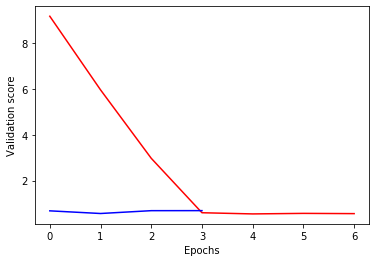

In [52]:
import matplotlib.pyplot as plt
# Define early_stopping_monitor
early_stopping_monitor = EarlyStopping(patience=2)

# Create the new model: model_2
model_2 = Sequential()

# Add the first and second layers
model_2.add(Dense(100, activation='relu', input_shape=input_shape))
model_2.add(Dense(100, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model_1
model_1_training = model_1.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Fit model_2
model_2_training = model_2.fit(predictors, target, epochs=15, validation_split=0.2, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

In [53]:
model_1 = Sequential()
model_1.add(Dense(50, activation='relu', input_shape = input_shape))
model_1.add(Dense(2, activation='softmax'))
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [54]:
model_1.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 50)                500       
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 102       
Total params: 602
Trainable params: 602
Non-trainable params: 0
_________________________________________________________________


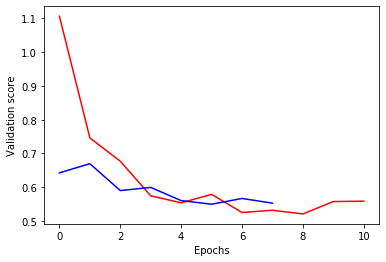

In [55]:
'''
Adding layers to a network
You've seen how to experiment with wider networks. In this exercise, you'll try a deeper
network (more hidden layers).
Once again, you have a baseline model called model_1 as a starting point. It has 1 hidden 
layer, with 50 units. You can see a summary of that model's structure printed out. You will 
create a similar network with 3 hidden layers (still keeping 50 units in each layer).
This will again take a moment to fit both models, so you'll need to wait a few seconds to
see the results after you run your code.
INSTRUCTIONS
100XP
Specify a model called model_2 that is like model_1, but which has 3 hidden layers of 50 units
instead of only 1 hidden layer.
Use input_shape to specify the input shape in the first hidden layer.
Use 'relu' activation for the 3 hidden layers and 'softmax' for the output layer, which 
should have 2 units.
Compile model_2 as you have done with previous models: Using 'adam' as the optimizer, 
'categorical_crossentropy' for the loss, and metrics=['accuracy'].
Hit 'Submit Answer' to fit both the models and visualize which one gives better results!
For both models, you should look for the best val_loss and val_acc, which won't be the 
last epoch for that model.
'''
# The input shape to use in the first hidden layer
input_shape = (n_cols,)

# Create the new model: model_2
model_2 = Sequential()

# Add the first, second, and third hidden layers
model_2.add(Dense(50, activation='relu', input_shape=input_shape))
model_2.add(Dense(50, activation='relu'))
model_2.add(Dense(50, activation='relu'))

# Add the output layer
model_2.add(Dense(2, activation='softmax'))

# Compile model_2
model_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit model 1
model_1_training = model_1.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Fit model 2
model_2_training = model_2.fit(predictors, target, epochs=20, validation_split=0.4, callbacks=[early_stopping_monitor], verbose=False)

# Create the plot
plt.plot(model_1_training.history['val_loss'], 'r', model_2_training.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()

#### Stepping up to images
Recognizing handwritten digits
MNIST dataset
28X28 grid flattened to 784 values for each image
Value in each part of array denotes darkness of that pixel



In [1]:
import pandas as pd
mnist = pd.read_csv('mnist.csv.txt', header=None)
mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.61,0.611,0.612,0.613,0.614,0.615,0.616,0.617
1,4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
3,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000,0.000,0.00,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [2]:
import numpy as np
from keras.utils import to_categorical
X = mnist.iloc[:, 1:].astype(np.float32).to_numpy()
y = to_categorical(mnist.iloc[:, 0])

Using TensorFlow backend.
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dave_\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [5]:
'''
Building your own digit recognition model
You've reached the final exercise of the course - you now know everything you need to build 
an accurate model to recognize handwritten digits!
We've already done the basic manipulation of the MNIST dataset shown in the video, so you
have X and y loaded and ready to model with. Sequential and Dense from keras are also
pre-imported.
To add an extra challenge, we've loaded only 2500 images, rather than 60000 which you will
see in some published results. Deep learning models perform better with more data, however,
they also take longer to train, especially when they start becoming more complex.
If you have a computer with a CUDA compatible GPU, you can take advantage of it to improve 
computation time. If you don't have a GPU, no problem! You can set up a deep learning
environment in the cloud that can run your models on a GPU. Here is a blog post by Dan 
that explains how to do this - check it out after completing this exercise! It is a
great next step as you continue your deep learning journey.
INSTRUCTIONS
100XP
Create a Sequential object to start your model. Call this model.
Add the first Dense hidden layer of 50 units to your model with 'relu' activation. 
For this data, the input_shape is (784,).
Add a second Dense hidden layer with 50 units and a 'relu' activation function.
Add the output layer. Your activation function should be 'softmax', and the number of nodes
in this layer should be the same as the number of possible outputs in this case: 10.
Compile model as you have done with previous models: Using 'adam' as the optimizer, 
'categorical_crossentropy' for the loss, and metrics=['accuracy'].
Fit the model using X and y using a validation_split of 0.3.
'''

from keras.layers import Dense
from keras.models import Sequential

# Create the model: model
model = Sequential()

# Add the first hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the second hidden layer
model.add(Dense(50, activation='relu', input_shape=(784,)))

# Add the output layer
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
model.fit(X, y, validation_split=0.3, epochs=50)

Train on 1400 samples, validate on 601 samples
Epoch 1/50
1400/1400 [==============================] - 0s 175us/step - loss: 26.2651 - accuracy: 0.3350 - val_loss: 7.6869 - val_accuracy: 0.4908
Epoch 2/50
1400/1400 [==============================] - 0s 72us/step - loss: 4.4713 - accuracy: 0.6071 - val_loss: 4.3876 - val_accuracy: 0.5940
Epoch 3/50
1400/1400 [==============================] - 0s 79us/step - loss: 2.3449 - accuracy: 0.7150 - val_loss: 4.1503 - val_accuracy: 0.6073
Epoch 4/50
1400/1400 [==============================] - 0s 64us/step - loss: 1.4448 - accuracy: 0.7750 - val_loss: 3.1830 - val_accuracy: 0.6805
Epoch 5/50
1400/1400 [==============================] - 0s 71us/step - loss: 0.9671 - accuracy: 0.8457 - val_loss: 3.0500 - val_accuracy: 0.6955
Epoch 6/50
1400/1400 [==============================] - 0s 68us/step - loss: 0.6362 - accuracy: 0.8814 - val_loss: 2.9058 - val_accuracy: 0.6839
Epoch 7/50
1400/1400 [==============================] - 0s 73us/step - loss: 0.54

Next steps: <br>
Start with standard prediction problems of tables of numbers<br>
Images (with convolutional neural networks) are common next steps<br>
keras.io for excellent documentation<br>
GRAphical processing unit (GPU) provides dramatic speedups in model training times<br>
Need a CUDA compatible GPU<br>
For training on using GPUs in the cloud look here:<br>
http://bit.ly/2mYQXQb

